In [35]:
pip install tensorflow

  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
Processing c:\users\ruby\appdata\local\pip\cache\wheels\5f\fd\9e\b6cf5890494cb8ef0b5eaff72e5d55a70fb56316007d6dfe73\wrapt-1.12.1-py3-none-any.whl
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
Processing c:\users\ruby\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501\termcolor-1.1.0-py3-none-any.whl
  Using cached tensorboard_plugin_wit-1.8.0-py3-none-any.whl (781 kB)
  Using cached Markdown-3.3.4-py3-none-any.whl (97 kB)
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.33.2
    Uninstalling grpcio-1.33.2:
      Successfully uninstalled grpcio-1.33.2
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.11.2
    Uninstalling wrapt-1.11.2:
      Successfu

In [27]:
# 학습데이터 정제
# 임의의 프레임 추출코드 - 항목마다 전체 이미지 갯수가 다르다
import os
import cv2
import numpy as np
from PIL import Image
from tqdm.notebook import tqdm

base_dir = '../data/pre/'
folder_list = os.listdir(base_dir)

batch_size = 1
batch_x_data = list()
batch_t_data = list()

frame_num = 20

for folder in folder_list[0:3*batch_size]:
    for n in range(10):
        file_list = os.listdir(os.path.join(base_dir, (folder+'/'+str(n))))
        temp_data = list()
        for i in range(frame_num):
            img = Image.open(os.path.join(base_dir, (folder+'/'+str(n)+'/'+str(n)+'_'+str(int(i*(len(file_list)/frame_num)))+'.jpg')))
            img = img.resize(size=(112, 112))
            img = np.array(img)
            img = img.reshape(112,112,3)
            temp_data.append(img)
        temp_data = np.array(temp_data)
        batch_x_data.append(temp_data)
        batch_t_data.append(n)

In [28]:
# 리스트인 batch_x_data를 ndarray로
batch_x_data = np.array(batch_x_data)
print(batch_x_data.shape)

(30, 20, 112, 112, 3)


In [29]:
# 축변경
batch_x_data = np.swapaxes(batch_x_data,1,2)
batch_x_data = np.swapaxes(batch_x_data,2,3)

print(batch_x_data.shape)

(30, 112, 112, 20, 3)


In [30]:
# one_hot_encording

import pandas as pd

batch_t_data = np.array(batch_t_data)
batch_t_data = pd.DataFrame(batch_t_data, columns=['t'])
display(batch_t_data)
batch_t_data = pd.get_dummies(batch_t_data['t'])
display(batch_t_data)

,t
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


,0,1,2,3,4,5,6,7,8,9
0,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,0,0,1,0
9,0,0,0,0,0,0,0,0,0,1


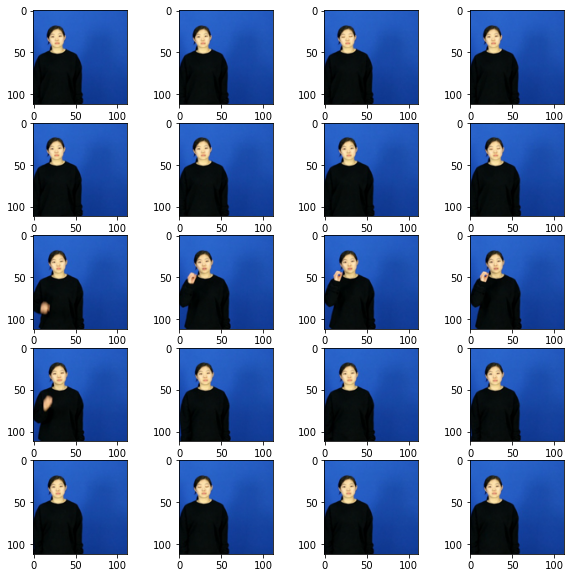

In [31]:
# 데이터 확인
import matplotlib.pyplot as plt


figure = plt.figure(figsize=(10,10))

fig_list=list()
for i in range(20):
    fig_list.append(figure.add_subplot(5,4,i+1))
    test = batch_x_data[0,:,:,i,:]
    fig_list[i].imshow(test.reshape(112,112,3))

In [36]:
# # GPU 메모리제한
# import tensorflow as tf

# physical_devices = tf.config.list_physical_devices('GPU') 
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#   # 텐서플로가 첫 번째 GPU에 1GB 메모리만 할당하도록 제한
#   try:
#     tf.config.experimental.set_virtual_device_configuration(
#         gpus[0],
#         [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024*6)])
#   except RuntimeError as e:
#     # 프로그램 시작시에 가상 장치가 설정되어야만 합니다
#     print(e)

IndexError: list index out of range

In [37]:
# 모델 작성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv3D, MaxPool3D,Flatten, Activation, BatchNormalization
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.regularizers import l2

input_shape = (112,112,30,3)
weight_decay = 0.005

model = Sequential()
model.add(Conv3D(64,(3,3,3), strides=(1,1,1), padding='same',
                 activation='relu', kernel_regularizer=l2(weight_decay),
                 input_shape=(112,112,20,3))) # 56 56 
model.add(MaxPool3D((2,2,1),strides=(2,2,1),padding='same'))

model.add(Conv3D(128,(3,3,3), strides=(1,1,1), padding='same',
                 activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(MaxPool3D((2,2,2),strides=(2,2,2),padding='same'))

model.add(Conv3D(256,(3,3,3), strides=(1,1,1), padding='same',
                 activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(Conv3D(256,(3,3,3), strides=(1,1,1), padding='same',
                 activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(MaxPool3D((2,2,2),strides=(2,2,2),padding='same'))

model.add(Conv3D(512,(3,3,3), strides=(1,1,1), padding='same',
                 activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(Conv3D(512,(3,3,3), strides=(1,1,1), padding='same',
                 activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(MaxPool3D((2,2,2),strides=(2,2,2),padding='same'))

model.add(Conv3D(512,(3,3,3), strides=(1,1,1), padding='same',
                 activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(Conv3D(512,(3,3,3), strides=(1,1,1), padding='same',
                 activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(MaxPool3D((2,2,2),strides=(2,2,2),padding='same'))

model.add(Flatten())
model.add(Dense(units=4096, activation='relu'))
model.add(Dense(units=4096, activation='relu'))

model.add(Dense(10, activation='softmax'))
model.summary()

model.compile(optimizer=RMSprop(learning_rate=1e-4), loss='categorical_crossentropy',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d (Conv3D)              (None, 112, 112, 20, 64)  5248      
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 56, 56, 20, 64)    0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 56, 56, 20, 128)   221312    
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 28, 28, 10, 128)   0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 28, 28, 10, 256)   884992    
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 28, 28, 10, 256)   1769728   
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 14, 14, 5, 256)    0

In [38]:
history = model.fit(x=batch_x_data, y=batch_t_data, epochs=20, validation_steps=39)

Epoch 1/20
1/1 [==============================] - 85s 85s/step - loss: 15.6041 - accuracy: 0.1000
Epoch 2/20
1/1 [==============================] - 83s 83s/step - loss: 92.9377 - accuracy: 0.0667
Epoch 3/20
1/1 [==============================] - 83s 83s/step - loss: 14.7573 - accuracy: 0.1000
Epoch 4/20
1/1 [==============================] - 83s 83s/step - loss: 14.1166 - accuracy: 0.1000
Epoch 5/20
1/1 [==============================] - 82s 82s/step - loss: 14.0455 - accuracy: 0.1333
Epoch 6/20
1/1 [==============================] - 83s 83s/step - loss: 13.9852 - accuracy: 0.5000
Epoch 7/20
1/1 [==============================] - 82s 82s/step - loss: 13.9366 - accuracy: 0.6667
Epoch 8/20
1/1 [==============================] - 83s 83s/step - loss: 13.8773 - accuracy: 0.4333
Epoch 9/20
1/1 [==============================] - 85s 85s/step - loss: 13.8285 - accuracy: 0.2000
Epoch 10/20
1/1 [==============================] - 87s 87s/step - loss: 13.7791 - accuracy: 0.4333
Epoch 11/20
1/1 [==

In [57]:
# 학습데이터 정제
# 임의의 프레임 추출코드 - 항목마다 전체 이미지 갯수가 다르다.
base_dir = '../data/pre/'
folder_list = os.listdir(base_dir)

batch_size = 6
frame_num = 20
shuffle_list = list(range(0,10))*batch_size

for batch in range(int(36/batch_size)):
    batch_x_data = list()
    batch_t_data = list()
    for folder in folder_list[batch*batch_size:(batch+1)*batch_size]:
        for n in range(10):
            file_list = os.listdir(os.path.join(base_dir, (folder+'/'+str(n))))
            temp_data = list()
            for i in range(frame_num):
                img = Image.open(os.path.join(base_dir, (folder+'/'+str(n)+'/'+str(n)+'_'+str(int(i*(len(file_list)/frame_num)))+'.jpg')))
                img = img.resize(size=(112, 112)) # 56 56
                img = np.array(img)
                # img = img.reshape(112,112,3)
                temp_data.append(img)
            temp_data = np.array(temp_data)
            batch_x_data.append(temp_data)
            batch_t_data.append(n)

    # 리스트인 batch_x_data를 ndarray로
    batch_x_data = np.array(batch_x_data)
    batch_t_data = np.array(batch_t_data)
    
    # 축변경
    batch_x_data = np.swapaxes(batch_x_data,1,2)
    batch_x_data = np.swapaxes(batch_x_data,2,3)
    
    # data shuffle
    random.shuffle(shuffle_list)
    
    batch_x_data = batch_x_data[shuffle_list]
    batch_t_data = batch_t_data[shuffle_list]

    # one_hot_encording
    batch_t_data = np.array(batch_t_data)
    batch_t_data = pd.DataFrame(batch_t_data, columns=['t'])
    batch_t_data = pd.get_dummies(batch_t_data['t'])
    
    # learning
    history = model.fit(x=batch_x_data, y=batch_t_data, epochs=10)

Epoch 1/10
2/2 [==============================] - 190s 87s/step - loss: 10.3968 - accuracy: 0.1500
Epoch 2/10
2/2 [==============================] - 185s 90s/step - loss: 9.8293 - accuracy: 0.6167
Epoch 3/10
2/2 [==============================] - 183s 85s/step - loss: 9.4724 - accuracy: 0.3833
Epoch 4/10


KeyboardInterrupt: 

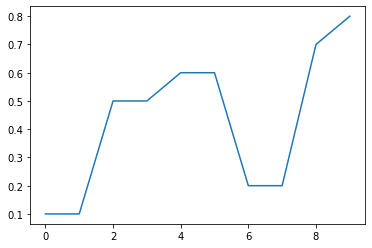

In [44]:
# batch size = 3
plt.plot(history.history['accuracy'])
plt.show()

In [ ]:
# batch size = 6